In [2]:
# https://www.kaggle.com/datasets/irisk9/loanstats3a


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# ---- Load the LoanStats3a.csv dataset ----
data = pd.read_csv("C:/Users/hp/Downloads/LoanStats3a.csv", skiprows=1)  # Adjust path if necessary

# ---- Data Preprocessing ----
print(data.head())  # Look at the first few rows

# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# Split data into features and target
X = data.drop(columns=['loan_status'])  # Drop the target column
y = data['loan_status']  # The target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Linear Regression ----
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# ---- Ridge Regression ----
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# ---- Lasso Regression ----
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# ---- XGBoost Regression ----
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Evaluation metric
    'seed': 42
}

xgboost_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgboost_model.predict(dtest)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# ---- Accuracy ----
accuracy_linear = accuracy_score(y_test, np.round(y_pred_linear))
accuracy_ridge = accuracy_score(y_test, np.round(y_pred_ridge))
accuracy_lasso = accuracy_score(y_test, np.round(y_pred_lasso))
accuracy_xgb = accuracy_score(y_test, np.round(y_pred_xgb))

# ---- Print Results ----
print(f"Linear Regression: MSE = {mse_linear:.2f}, R² = {r2_linear:.2f}, Accuracy = {accuracy_linear:.2f}")
print(f"Ridge Regression: MSE = {mse_ridge:.2f}, R² = {r2_ridge:.2f}, Accuracy = {accuracy_ridge:.2f}")
print(f"Lasso Regression: MSE = {mse_lasso:.2f}, R² = {r2_lasso:.2f}, Accuracy = {accuracy_lasso:.2f}")
print(f"XGBoost Regression: MSE = {mse_xgb:.2f}, R² = {r2_xgb:.2f}, Accuracy = {accuracy_xgb:.2f}")

# ---- Heatmap: Correlation Matrix ----
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap - LoanStats3a Dataset")
plt.show()

# ---- Pair Plot ----
# If dataset has too many features, it may not be practical for a pair plot.
sns.pairplot(data[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']], hue='loan_status', palette='coolwarm', markers=["o", "s"], diag_kind='kde', height=2.5)
plt.suptitle("Pair Plot of Selected Features with Loan Status", y=1.02)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_1144\2840325169.py:15: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/hp/Downloads/LoanStats3a.csv", skiprows=1)  # Adjust path if necessary


   Unnamed: 0     5000   5000.1     4975   36 months  10.65%  162.87  B  B2  \
0         NaN   2500.0   2500.0   2500.0   60 months  15.27%   59.83  C  C4   
1         NaN   2400.0   2400.0   2400.0   36 months  15.96%   84.33  C  C5   
2         NaN  10000.0  10000.0  10000.0   36 months  13.49%  339.31  C  C1   
3         NaN   3000.0   3000.0   3000.0   60 months  12.69%   67.79  B  B5   
4         NaN   5000.0   5000.0   5000.0   36 months   7.90%  156.46  A  A4   

                 Unnamed: 9  ... Unnamed: 134 Unnamed: 135  Cash N.1  \
0                     Ryder  ...          NaN          NaN  Cash   N   
1                       NaN  ...          NaN          NaN  Cash   N   
2       AIR RESOURCES BOARD  ...          NaN          NaN  Cash   N   
3  University Medical Group  ...          NaN          NaN  Cash   N   
4      Veolia Transportaton  ...          NaN          NaN  Cash   N   

  Unnamed: 138 Unnamed: 139 Unnamed: 140  Unnamed: 141 Unnamed: 142  \
0          NaN       

KeyError: "['loan_status'] not found in axis"

In [14]:
# View the top 5 rows of data
pd.set_option('display.max_columns', None)

data.head(5)

,5000,5000.1,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0.1,13648,83.70%,9,f,0.2,0.3,5863.155187,5833.84,5000.2,863.16,0.4,0.5,0.6,Jan-15,171.62,Jul-18,0.7,1.1,Individual,0.8,0.9,0.10,0.11,0.12,N,Cash,N.1
0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,0.094,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,0.985,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,0.210,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,0.539,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Apr-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,5000.0,5000.0,5000.0,36 months,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963.0,0.283,12.0,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.00,Jan-15,161.03,Feb-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [15]:
# Size of the dataset
data.shape

(42537, 53)

In [16]:
# Checking info of the raw dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42537 entries, 0 to 42536
Data columns (total 53 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   5000                                                                            42534 non-null  float64
 1   5000.1                                                                          42534 non-null  float64
 2   4975                                                                            42534 non-null  float64
 3    36 months                                                                      42534 non-null  object 
 4   10.65%                                                                          42534 non-null  float64
 5   162.87                                                                          42534 non-null  float64
 6   B             

In [17]:
# Check missing values
data.isnull().sum()

5000                                                                                  3
5000.1                                                                                3
4975                                                                                  3
 36 months                                                                            3
10.65%                                                                                3
162.87                                                                                3
B                                                                                     3
B2                                                                                    3
10+ years                                                                          1115
RENT                                                                                  3
24000                                                                                 7
Verified                        

In [18]:
# Total percentage of null values in the data
pct = (data.isnull().sum().sum())/(data.shape[0]*data.shape[1])
print("Overall missing values in the data ≈ {:.2f} %".format(pct*100))

Overall missing values in the data ≈ 0.74 %


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


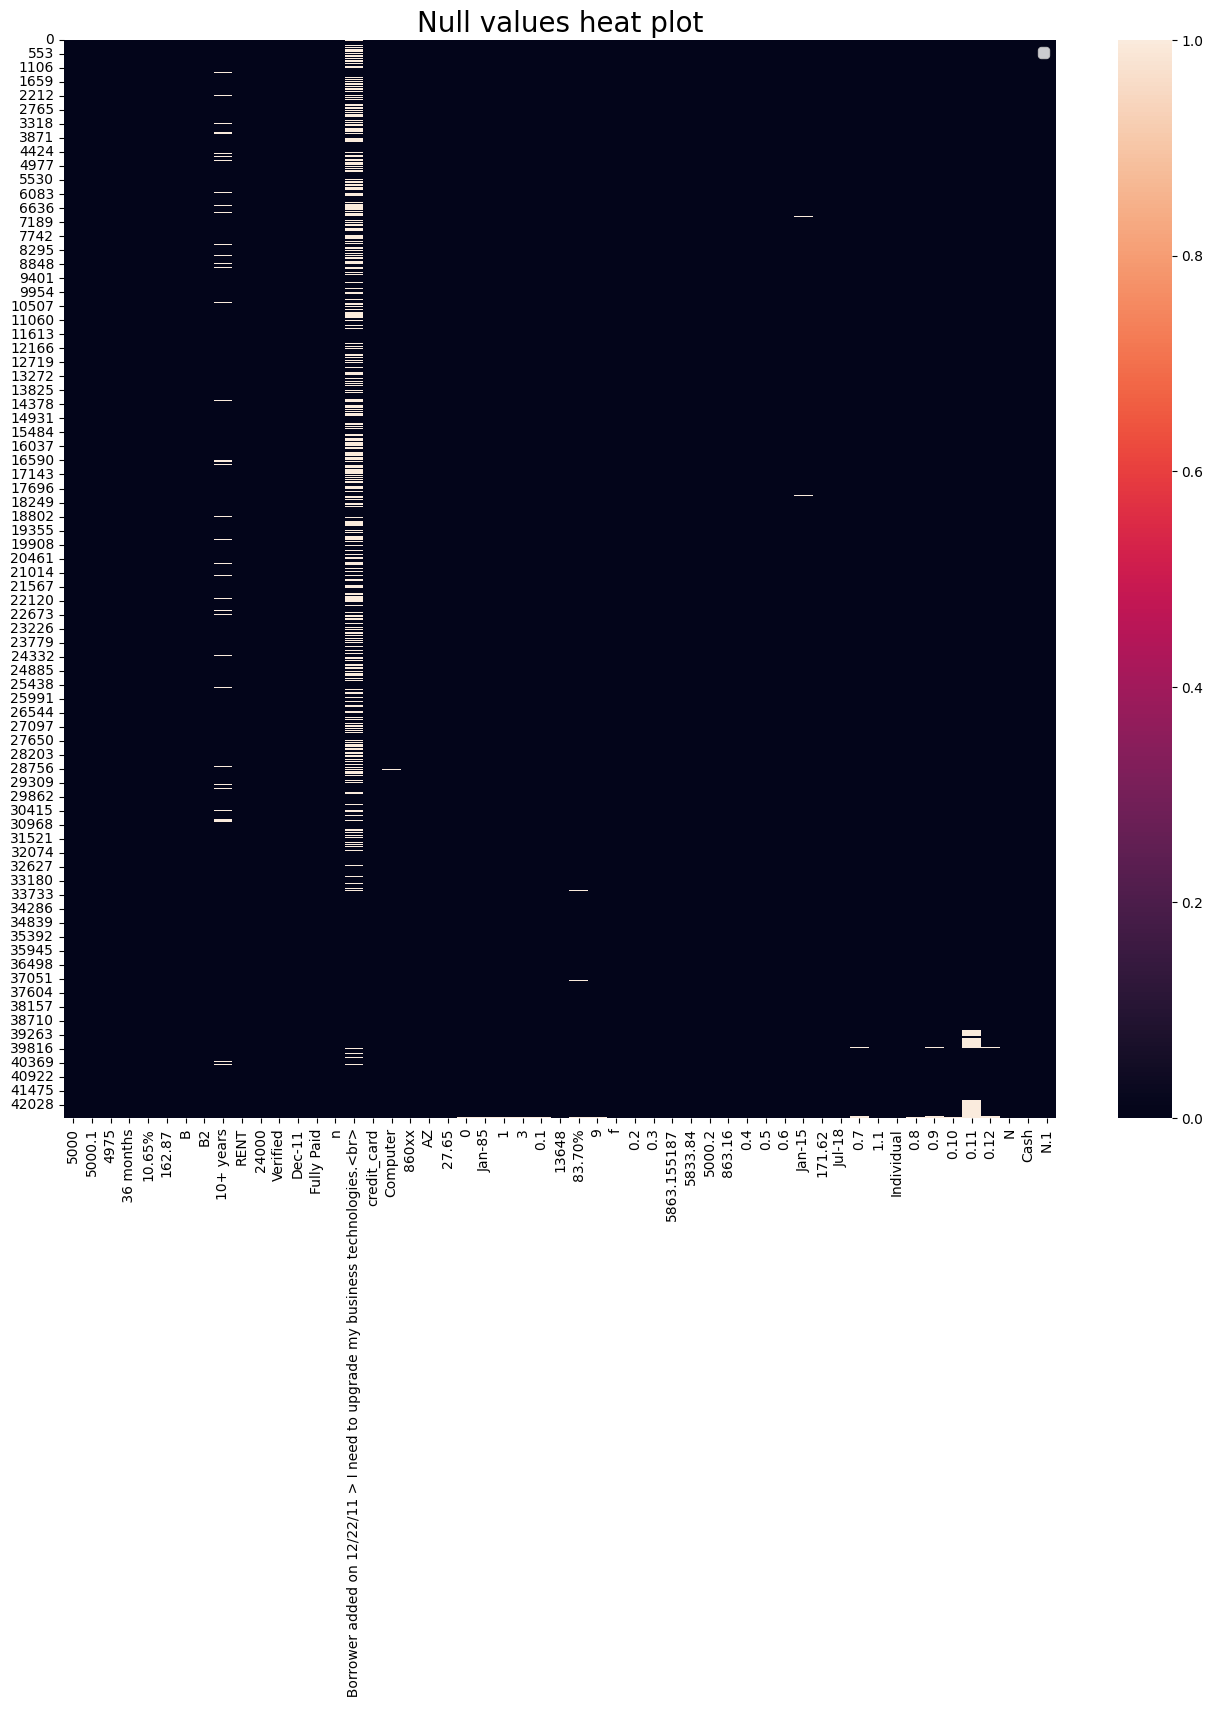

In [19]:
# Checking for null values using a heatmap as a visualizing tool
plt.figure(figsize=(16,14))
sns.heatmap(data.isnull())
plt.title('Null values heat plot', fontdict={'fontsize': 20})
plt.legend(data.isnull())
plt.show()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ---- Load the LoanStats3a.csv dataset ----
data = pd.read_csv("C:/Users/hp/Downloads/LoanStats3a.csv", skiprows=1)

# ---- Data Preprocessing ----
print(data.head())  # Inspect first few rows

# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# ---- Encode Loan Status ----
# Convert 'loan_status' (which is a string) into numeric format using Label Encoding
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])

# Split data into features and target
X = data.drop(columns=['loan_status'])  # Drop the target column
y = data['loan_status']  # The target column 'loan_status' is now numeric

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Logistic Regression (for Classification) ----
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# ---- Ridge Regression (for Classification) ----
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
accuracy_ridge = accuracy_score(y_test, np.round(y_pred_ridge))  # Round predictions to nearest integer

# ---- Lasso Regression (for Classification) ----
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
accuracy_lasso = accuracy_score(y_test, np.round(y_pred_lasso))  # Round predictions to nearest integer

# ---- XGBoost (for Classification) ----
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # Classification task
    'eval_metric': 'logloss',  # Evaluation metric
    'seed': 42
}

xgboost_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgboost_model.predict(dtest)
y_pred_xgb_binary = np.round(y_pred_xgb)  # Convert to binary output (0 or 1)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)

# ---- Print Results ----
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Ridge Regression Accuracy: {accuracy_ridge:.2f}")
print(f"Lasso Regression Accuracy: {accuracy_lasso:.2f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# ---- Visualizations ----

# Plot accuracy comparison of different models
models = ['Logistic Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost']
accuracies = [accuracy_logreg, accuracy_ridge, accuracy_lasso, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='lightblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()

# ---- Decision Tree ----
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=le.classes_, fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_1144\3153256235.py:12: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/hp/Downloads/LoanStats3a.csv", skiprows=1)


   Unnamed: 0     5000   5000.1     4975   36 months  10.65%  162.87  B  B2  \
0         NaN   2500.0   2500.0   2500.0   60 months  15.27%   59.83  C  C4   
1         NaN   2400.0   2400.0   2400.0   36 months  15.96%   84.33  C  C5   
2         NaN  10000.0  10000.0  10000.0   36 months  13.49%  339.31  C  C1   
3         NaN   3000.0   3000.0   3000.0   60 months  12.69%   67.79  B  B5   
4         NaN   5000.0   5000.0   5000.0   36 months   7.90%  156.46  A  A4   

                 Unnamed: 9  10+ years  RENT    24000         Verified  \
0                     Ryder   < 1 year  RENT  30000.0  Source Verified   
1                       NaN  10+ years  RENT  12252.0     Not Verified   
2       AIR RESOURCES BOARD  10+ years  RENT  49200.0  Source Verified   
3  University Medical Group     1 year  RENT  80000.0  Source Verified   
4      Veolia Transportaton    3 years  RENT  36000.0  Source Verified   

   Dec-11   Fully Paid  n  Unnamed: 17  \
0  Dec-11  Charged Off  n          NaN

KeyError: 'loan_status'

In [30]:
# Check the column names of the dataset
print(data.columns)


Index(['Unnamed: 0', '5000', '5000.1', '4975', '162.87', '24000',
       'Unnamed: 17', '27.65', '0', '1',
       ...
       'Unnamed: 129', 'Unnamed: 130', 'Unnamed: 131', 'Unnamed: 132',
       'Unnamed: 133', 'Unnamed: 134', 'Unnamed: 135', 'Unnamed: 141',
       'Unnamed: 142', 'Unnamed: 143'],
      dtype='object', length=115)


In [32]:
print(data.loan_status)

AttributeError: 'DataFrame' object has no attribute 'loan_status'

C:\Users\hp\AppData\Local\Temp\ipykernel_1144\3066424788.py:6: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/hp/Downloads/LoanStats3a.csv", skiprows=1)  # Adjust the path if needed


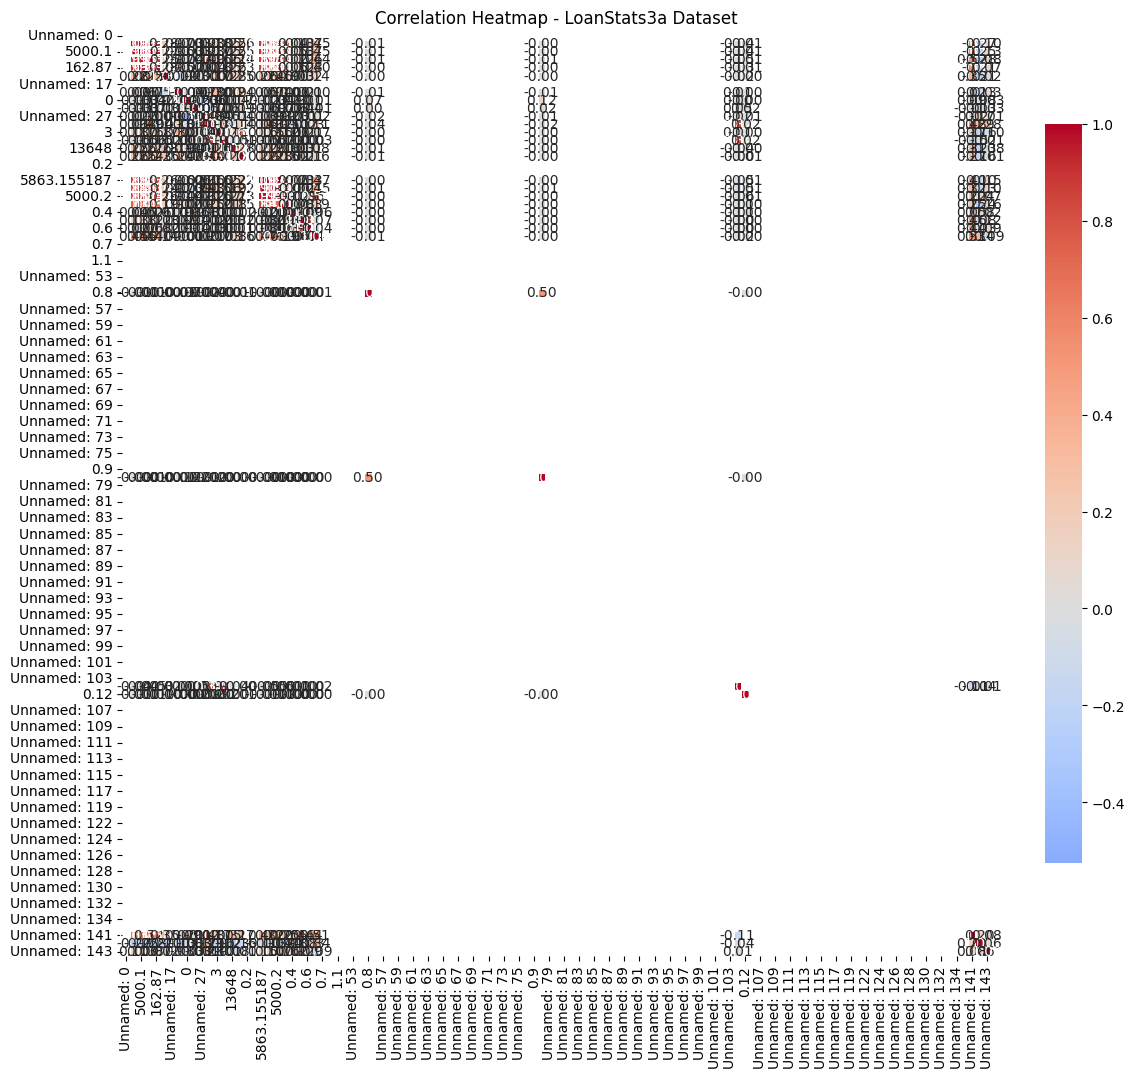

ValueError: Could not interpret value `loan_amnt` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("C:/Users/hp/Downloads/LoanStats3a.csv", skiprows=1)  # Adjust the path if needed

# ---- Data Preprocessing ----
data = data.select_dtypes(include=[np.number])  # Selecting only numeric columns

# ---- Heatmap: Correlation Matrix ----
corr_matrix = data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap - LoanStats3a Dataset")
plt.show()

# ---- Bar Graph: Distribution of Loan Amount ----
plt.figure(figsize=(8, 6))
sns.barplot(x='loan_amnt', y='int_rate', data=data)
plt.title("Bar Plot of Loan Amount vs Interest Rate")
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# ---- Pair Plot ----
# You can select a few columns to create a pair plot for visualizing relationships
sns.pairplot(data[['loan_amnt', 'int_rate', 'annual_inc', 'dti']], height=2.5)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()
